In [1]:
import numpy as np 
import pandas as pd 
import random
import warnings 

random.seed(0)

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data/cleaned_metadata.csv')
df.head()

,data_provider,region,lat,lon,severity,year,month,day,season,hour,minute,second,am,bacteria_counts,log_density,log_distance_to_water_m
0,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,1,2018,5,14,spring,15,0,0,0,<20K,6.371612,0.000000
1,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,4,2016,8,31,summer,16,15,0,0,1M - <10M,15.584939,8.163941
2,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,1,2020,11,19,fall,0,1,0,1,<20K,5.669881,6.242223
3,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,1,2016,8,24,summer,0,1,0,1,<20K,7.386471,4.859812
4,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,3,2019,7,23,summer,0,1,0,1,100K - <1M,11.624690,2.944439


In [3]:
df.drop(['data_provider', 'second', 'am'], axis = 1, inplace = True)

In [4]:
df.head()

,region,lat,lon,severity,year,month,day,season,hour,minute,bacteria_counts,log_density,log_distance_to_water_m
0,midwest,39.080319,-86.430867,1,2018,5,14,spring,15,0,<20K,6.371612,0.000000
1,west,36.559700,-121.510000,4,2016,8,31,summer,16,15,1M - <10M,15.584939,8.163941
2,south,35.875083,-78.878434,1,2020,11,19,fall,0,1,<20K,5.669881,6.242223
3,south,35.487000,-79.062133,1,2016,8,24,summer,0,1,<20K,7.386471,4.859812
4,midwest,38.049471,-99.827001,3,2019,7,23,summer,0,1,100K - <1M,11.624690,2.944439


In [5]:
from sklearn.preprocessing import LabelEncoder

le_region = LabelEncoder()
le_season = LabelEncoder()
df['region'] = le_region.fit_transform(df['region'])
df['season'] = le_season.fit_transform(df['season'])

In [6]:
models = {'Model Name': [],
          'Accuracy' : [],
          'Model' : []}

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['severity', 'bacteria_counts', 'log_density'], axis = 1)
y = df['severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size=0.2)

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

model_1 = LogisticRegression()
model_2 = RidgeClassifier()

In [11]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

RidgeClassifier()

In [12]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Accuracy : {accuracy_score(y_test, pred_1)}')
print(f'Report : {classification_report(y_test, pred_1)}')
print(f'Matrix : {confusion_matrix(y_test, pred_1)}')

Accuracy : 0.5301230377598642
Report :               precision    recall  f1-score   support

           0       0.07      0.82      0.13        38
           1       0.65      0.50      0.57      1870
           2       0.25      0.28      0.26       837
           3       0.42      0.30      0.35       803
           4       0.92      0.91      0.92      1152
           5       0.01      0.07      0.01        14

    accuracy                           0.53      4714
   macro avg       0.39      0.48      0.37      4714
weighted avg       0.60      0.53      0.56      4714

Matrix : [[  31    2    0    5    0    0]
 [ 189  943  526  138    8   66]
 [ 102  332  238  130    7   28]
 [ 107  163  190  242   68   33]
 [  16    9   17   48 1044   18]
 [   3    0    0    8    2    1]]


In [14]:
print(f'Accuracy : {accuracy_score(y_test, pred_2)}')
print(f'Report : {classification_report(y_test, pred_2)}')
print(f'Matrix : {confusion_matrix(y_test, pred_2)}')

Accuracy : 0.5159100551548579
Report :               precision    recall  f1-score   support

           0       0.06      0.97      0.10        38
           1       0.63      0.51      0.57      1870
           2       0.23      0.17      0.20       837
           3       0.41      0.30      0.35       803
           4       0.91      0.91      0.91      1152
           5       0.01      0.07      0.01        14

    accuracy                           0.52      4714
   macro avg       0.38      0.49      0.36      4714
weighted avg       0.59      0.52      0.54      4714

Matrix : [[  37    1    0    0    0    0]
 [ 278  957  356  151   16  112]
 [ 152  359  144  137   11   34]
 [ 169  182  108  241   73   30]
 [  29    9    6   46 1052   10]
 [   4    0    0    6    3    1]]


In [15]:
models['Model Name'].append('Logistic Regression')
models['Accuracy'].append(accuracy_score(y_test, pred_1))
models['Model'].append(model_1)

models['Model Name'].append('Ridge Classifier')
models['Accuracy'].append(accuracy_score(y_test, pred_2))
models['Model'].append(model_2)

In [16]:
from sklearn.svm import SVC
model_3 = SVC()
model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, pred_3)}')
print(f'Report : {classification_report(y_test, pred_3)}')
print(f'Matrix : {confusion_matrix(y_test, pred_3)}')

Accuracy : 0.5655494272380144
Report :               precision    recall  f1-score   support

           0       0.11      0.71      0.19        38
           1       0.71      0.50      0.59      1870
           2       0.28      0.39      0.33       837
           3       0.47      0.42      0.44       803
           4       0.93      0.90      0.92      1152
           5       0.01      0.07      0.01        14

    accuracy                           0.57      4714
   macro avg       0.42      0.50      0.41      4714
weighted avg       0.64      0.57      0.59      4714

Matrix : [[  27    4    2    3    0    2]
 [  98  931  631  137    5   68]
 [  59  243  325  181    6   23]
 [  48  130  185  341   65   34]
 [   8    3   17   62 1041   21]
 [   3    0    0    6    4    1]]


In [17]:
models['Model Name'].append('SVC')
models['Accuracy'].append(accuracy_score(y_test, pred_3))
models['Model'].append(model_3)

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier()
model_4.fit(X_train, y_train)
pred_4 = model_4.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, pred_4)}')
print(f'Report : {classification_report(y_test, pred_4)}')
print(f'Matrix : {confusion_matrix(y_test, pred_4)}')

Accuracy : 0.615188799321171
Report :               precision    recall  f1-score   support

           0       0.25      0.34      0.29        38
           1       0.72      0.68      0.70      1870
           2       0.31      0.34      0.32       837
           3       0.41      0.41      0.41       803
           4       0.87      0.87      0.87      1152
           5       0.00      0.00      0.00        14

    accuracy                           0.62      4714
   macro avg       0.43      0.44      0.43      4714
weighted avg       0.63      0.62      0.62      4714

Matrix : [[  13   13    5    6    1    0]
 [  23 1274  392  164   15    2]
 [   9  323  287  181   30    7]
 [   4  151  213  326  100    9]
 [   0    6   31  108 1000    7]
 [   2    1    3    5    3    0]]


In [19]:
models['Model Name'].append('Decision Tree')
models['Accuracy'].append(accuracy_score(y_test, pred_4))
models['Model'].append(model_4)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model_5 = RandomForestClassifier()
model_5.fit(X_train, y_train)
pred_5 = model_5.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, pred_5)}')
print(f'Report : {classification_report(y_test, pred_5)}')
print(f'Matrix : {confusion_matrix(y_test, pred_5)}')

Accuracy : 0.6506151887993211
Report :               precision    recall  f1-score   support

           0       0.35      0.50      0.41        38
           1       0.75      0.70      0.73      1870
           2       0.33      0.35      0.34       837
           3       0.46      0.48      0.47       803
           4       0.91      0.92      0.91      1152
           5       0.00      0.00      0.00        14

    accuracy                           0.65      4714
   macro avg       0.47      0.49      0.48      4714
weighted avg       0.66      0.65      0.65      4714

Matrix : [[  19   12    2    4    1    0]
 [  20 1314  369  157    7    3]
 [   9  299  297  214   14    4]
 [   3  121  207  382   83    7]
 [   2    4   17   72 1055    2]
 [   1    0    2    7    4    0]]


In [21]:
models['Model Name'].append('RAndom Forest')
models['Accuracy'].append(accuracy_score(y_test, pred_5))
models['Model'].append(model_5)

In [22]:
from xgboost import XGBClassifier

model_6 = XGBClassifier()
model_6.fit(X_train, y_train)
pred_6 = model_6.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, pred_6)}')
print(f'Report : {classification_report(y_test, pred_6)}')
print(f'Matrix : {confusion_matrix(y_test, pred_6)}')

Accuracy : 0.6641917691981333
Report :               precision    recall  f1-score   support

           0       0.33      0.50      0.40        38
           1       0.75      0.71      0.73      1870
           2       0.36      0.38      0.37       837
           3       0.49      0.51      0.50       803
           4       0.93      0.91      0.92      1152
           5       0.08      0.14      0.11        14

    accuracy                           0.66      4714
   macro avg       0.49      0.53      0.50      4714
weighted avg       0.67      0.66      0.67      4714

Matrix : [[  19   10    3    5    1    0]
 [  22 1331  356  153    4    4]
 [   8  296  321  197    8    7]
 [   5  122  195  406   69    6]
 [   3    7   17   68 1052    5]
 [   1    0    1    8    2    2]]


In [23]:
models['Model Name'].append('XGBoost')
models['Accuracy'].append(accuracy_score(y_test, pred_6))
models['Model'].append(model_6)

<Axes: >

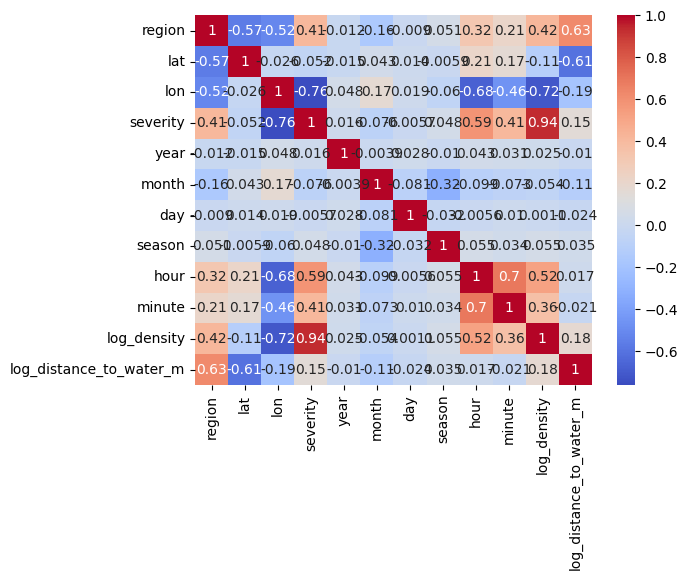

In [24]:
import seaborn as sns

sns.heatmap(df.drop('bacteria_counts', axis = 1).corr(), annot=True, cmap = 'coolwarm')

In [25]:
df.drop('bacteria_counts', axis = 1).corr()

,region,lat,lon,severity,year,month,day,season,hour,minute,log_density,log_distance_to_water_m
region,1.000000,-0.568467,-0.520201,0.412213,-0.012085,-0.157914,-0.009027,0.051156,0.324109,0.212723,0.417986,0.625037
lat,-0.568467,1.000000,-0.026415,-0.051733,-0.014600,0.042835,0.014403,-0.005907,0.212110,0.166624,-0.108893,-0.605906
lon,-0.520201,-0.026415,1.000000,-0.761598,0.048019,0.170865,0.018749,-0.059584,-0.677102,-0.460458,-0.715859,-0.191204
severity,0.412213,-0.051733,-0.761598,1.000000,0.016363,-0.076395,-0.005740,0.048441,0.586690,0.410544,0.937246,0.146791
year,-0.012085,-0.014600,0.048019,0.016363,1.000000,-0.003862,0.028439,-0.010025,0.042627,0.031158,0.024870,-0.010123
month,-0.157914,0.042835,0.170865,-0.076395,-0.003862,1.000000,-0.080762,-0.316035,-0.099100,-0.073381,-0.054318,-0.111459
day,-0.009027,0.014403,0.018749,-0.005740,0.028439,-0.080762,1.000000,-0.031711,-0.005575,0.010151,0.001125,-0.024152
season,0.051156,-0.005907,-0.059584,0.048441,-0.010025,-0.316035,-0.031711,1.000000,0.055418,0.034472,0.054769,0.034856
hour,0.324109,0.212110,-0.677102,0.586690,0.042627,-0.099100,-0.005575,0.055418,1.000000,0.695294,0.521494,0.016890
minute,0.212723,0.166624,-0.460458,0.410544,0.031158,-0.073381,0.010151,0.034472,0.695294,1.000000,0.361668,-0.021021


In [26]:
models = pd.DataFrame(models)
models

,Model Name,Accuracy,Model
0,Logistic Regression,0.530123,LogisticRegression()
1,Ridge Classifier,0.515910,RidgeClassifier()
2,SVC,0.565549,SVC()
3,Decision Tree,0.615189,DecisionTreeClassifier()
4,RAndom Forest,0.650615,"(DecisionTreeClassifier(max_features='sqrt', r..."
5,XGBoost,0.664192,"XGBClassifier(base_score=None, booster=None, c..."


In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [29]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)

Y[0:5]

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [31]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [34]:
history = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16
    )

Epoch 1/100
2893/2893 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5195 - loss: 1.2294 - val_accuracy: 0.5163 - val_loss: 1.1211
Epoch 2/100
2893/2893 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6048 - loss: 0.9746 - val_accuracy: 0.5488 - val_loss: 1.0500
Epoch 3/100
2893/2893 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6240 - loss: 0.9184 - val_accuracy: 0.5846 - val_loss: 1.0319
Epoch 4/100
2893/2893 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6361 - loss: 0.8826 - val_accuracy: 0.5367 - val_loss: 1.0506
Epoch 5/100
2893/2893 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6496 - loss: 0.8489 - val_accuracy: 0.5647 - val_loss: 1.0663
Epoch 6/100
2893/2893 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6519 - loss: 0.8394 - val_accuracy: 0.5316 - val_loss: 1.0387
Epoch 7/100
2893/2893 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6676 - loss: 0.8014 - val_accuracy: 0.5662 - val_loss: 1.0034
Epoch 8/100
2893/2893 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6693 - loss: 0

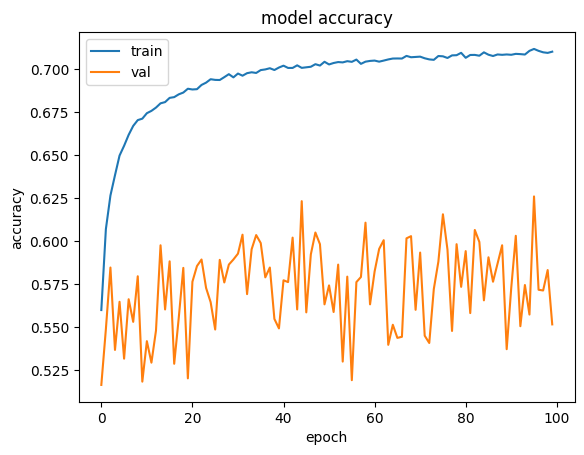

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
pred = model.predict(X_test)
pred_ = np.argmax(to_categorical(pred), axis = 1).flatten()

true_y = np.argmax(to_categorical(y_test), axis = 1)[:,1]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


In [37]:
scores = model.evaluate(X_test, y_test)

print(f'Accuracy : {scores[1]}')
print(f'Loss : {scores[0]}')

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5468 - loss: 1.0203  
Accuracy : 0.5515486001968384
Loss : 1.0450407266616821


In [40]:
import pickle 
with open('../Models/le_region.pkl','wb') as file:
    pickle.dump(le_region, file)
with open('../Models/le_season.pkl','wb') as file:
    pickle.dump(le_season, file)
with open('../Models/scaler.pkl','wb') as file:
    pickle.dump(scaler, file)

model.save('../Models/model.keras')